In [10]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import tensorflow as tf
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
#importing test and train data
train = pd.read_csv("mitbih_train.csv", header = None)
test = pd.read_csv("mitbih_test.csv", header = None)

In [113]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
train[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

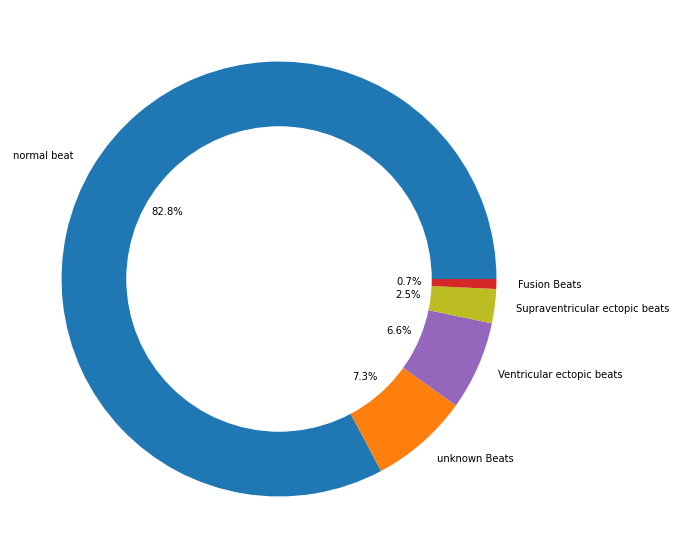

In [5]:
per_class = train[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
#Resampling 20000 record from normal beat(as its the biggest percent) set in order to balance the percentage of other cases
from sklearn.utils import resample

#resampled_arrayssequence of array-like of shape (n_samples,) or (n_samples, n_outputs)
#Sequence of resampled copies of the collections. The original arrays are not impacted.

#collecting classes from last coloumn and putting it in variables
d1=train[train[187]==1]
d2=train[train[187]==2]
d3=train[train[187]==3]
d4=train[train[187]==4]

#specifying 20000 recordfrom normal beat cases
d0=(train[train[187]==0]).sample(n=20000,random_state=42)

#Random_case Determines random number generation for shuffling the data.
#Pass an int for reproducible results across multiple function calls.

d1_upsampled=resample(d1,replace=True,n_samples=20000,random_state=123)
d2_upsampled=resample(d2,replace=True,n_samples=20000,random_state=124)
d3_upsampled=resample(d3,replace=True,n_samples=20000,random_state=125)
d4_upsampled=resample(d4,replace=True,n_samples=20000,random_state=126)

train=pd.concat([d0,d1_upsampled,d2_upsampled,d3_upsampled,d4_upsampled])

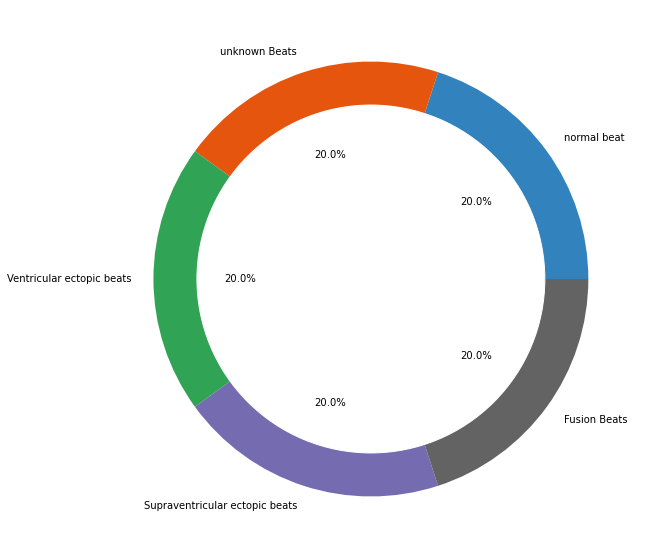

In [24]:
#testing the resampling by plotting the data
per_case = train[187].value_counts()
plt.figure(figsize=(20,10))
circle=plt.Circle( (0,0), 0.8, color='white')
cmap = plt.get_cmap("tab20c")
plt.pie(per_case, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=cmap(np.arange(5)*4),autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [12]:
classes=train.groupby(187,group_keys=False).apply(lambda train : train.sample(1))

In [13]:
categories=["Normal beat", "unknown Beat", "Ventricular ectopic beat", "Supraventricular ectopic beat", "Fusion Beat"]

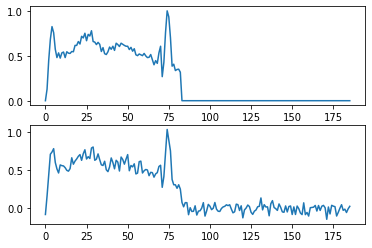

In [14]:
#adding gaussian  noise to the signals to make it more realistic
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)
tempo=classes.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(classes.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()


In [15]:
target_train=train[187]
target_test=test[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
x_train=train.iloc[:,:186].values
x_test=test.iloc[:,:186].values
x_train_cnn = x_train.reshape(len(x_train), x_train.shape[1],1)
x_test_cnn = x_test.reshape(len(x_test), x_test.shape[1],1)

In [56]:
model_ann = tf.keras.models.Sequential()


model_ann.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape=(186,)))

model_ann.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

model_ann.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

model_ann.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
model_ann.add(tf.keras.layers.Dense(5, activation='softmax'))

In [114]:
model_ann.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
ann_model_history = model_ann.fit(x_train, y_train, epochs=20, batch_size = 10, validation_data = (x_test, y_test))

Epoch 1/20
10000/10000 [==============================] - 45s 4ms/step - loss: 0.1138 - accuracy: 0.9616 - val_loss: 0.2938 - val_accuracy: 0.9115
Epoch 2/20
10000/10000 [==============================] - 42s 4ms/step - loss: 0.1126 - accuracy: 0.9620 - val_loss: 0.3494 - val_accuracy: 0.8915
Epoch 3/20
10000/10000 [==============================] - 44s 4ms/step - loss: 0.1087 - accuracy: 0.9631 - val_loss: 0.3341 - val_accuracy: 0.8891
Epoch 4/20
10000/10000 [==============================] - 45s 5ms/step - loss: 0.1075 - accuracy: 0.9637 - val_loss: 0.2474 - val_accuracy: 0.9215
Epoch 5/20
10000/10000 [==============================] - 46s 5ms/step - loss: 0.1071 - accuracy: 0.9633 - val_loss: 0.2513 - val_accuracy: 0.9215
Epoch 6/20
10000/10000 [==============================] - 43s 4ms/step - loss: 0.1060 - accuracy: 0.9641 - val_loss: 0.2297 - val_accuracy: 0.9316
Epoch 7/20
10000/10000 [==============================] - 46s 5ms/step - loss: 0.1023 - accuracy: 0.9657 - val_loss: 0

In [120]:
model_ann.evaluate(x_test,y_test)

685/685 [==============================] - 2s 3ms/step - loss: 0.2741 - accuracy: 0.9197


[0.2741481363773346, 0.9196510314941406]

In [16]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Conv1D, MaxPooling1D, Flatten , Conv2DTranspose
import warnings
from keras.optimizers import Adam


from keras.layers.normalization import BatchNormalization

In [17]:
def build_model():
    model = Sequential()
    im_shape=(x_train_cnn.shape[1],1)
    
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = im_shape)) 
   
    model.add(BatchNormalization())
    

    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Flatten())
    model.add(Dense(units = 64, activation='relu'))

    model.add(Dense(units = 64, activation='relu'))

    model.add(Dense(units = 5, activation='softmax'))

    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [18]:
model_cnn = build_model()

In [36]:
history = model_cnn.fit(x_train_cnn, y_train, epochs = 20, batch_size = 32, validation_data=(x_test_cnn, y_test))

Epoch 1/20
3125/3125 [==============================] - 320s 102ms/step - loss: 0.1909 - accuracy: 0.9322 - val_loss: 0.2747 - val_accuracy: 0.9007
Epoch 2/20
3125/3125 [==============================] - 320s 102ms/step - loss: 0.0756 - accuracy: 0.9743 - val_loss: 0.1304 - val_accuracy: 0.9574
Epoch 3/20
3125/3125 [==============================] - 339s 109ms/step - loss: 0.0506 - accuracy: 0.9834 - val_loss: 0.1079 - val_accuracy: 0.9695
Epoch 4/20
3125/3125 [==============================] - 348s 111ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.1200 - val_accuracy: 0.9678
Epoch 5/20
3125/3125 [==============================] - 353s 113ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.1307 - val_accuracy: 0.9683
Epoch 6/20
3125/3125 [==============================] - 363s 116ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.1917 - val_accuracy: 0.9551
Epoch 7/20
3125/3125 [==============================] - 344s 110ms/step - loss: 0.0238 - accuracy: 0.9925 - val_

<AxesSubplot:>

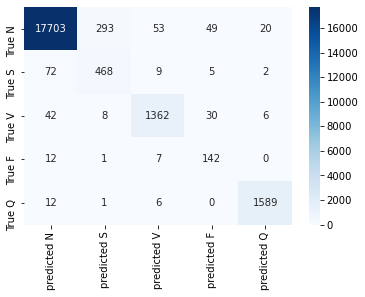

In [111]:
#confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
def plot_confusion_matrix(y_test,y_pred):
    classes=['N', 'S', 'V', 'F', 'Q']
    column = [f'predicted {label}'for label in classes]
    row = [f'True {label}'for label in classes]
    table = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
                         ,columns =column, index = row)
    return sns.heatmap(table, annot= True, fmt='d', cmap='Blues')

plot_confusion_matrix(y_test,y_pred)

In [26]:
#saving the model as a hdm5 file
model_cnn.save('model.h5')

In [15]:
from keras.models import load_model
newModel=load_model('model.h5')

In [124]:
pred=model_ann.predict(x_test[900].reshape(1,186))
categoryIndex=np.argmax(pred)
categories[categoryIndex]

'Normal beat'

In [122]:
pred=model_cnn.predict(x_test_cnn[900].reshape(1,186,1))
categoryIndex=np.argmax(pred)
categories[categoryIndex]

'Normal beat'

In [19]:
tf.version.VERSION

'2.3.0'